# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. <br>Being a dentist myself, I found this set of data very interesting knowing how frustrating it is to medical practitioners when patients miss their scheduled appointments, especially when doctors have full days with long schedules holding many other patients on the waiting list that could have benefited from that appointment.<br>

> Analysing this set of data might yield insightful information that could help set some basic foundations on which the clinic's front office could set future appointments on (for example, patients who are more likely to miss their appointments should have the last appointment so that if they're 10 mins late, the doctor could leave early and not have to wait for the whole appointment duration till the following patient.) 


### Question(s) for Analysis
> 1) On which day of the week do patients frequently miss their appointments?

> 2) Do neighbourhoods play a role in patients missing their appoinments? <br>(Distance from the clinic? Socio-economic status of the patient?)

> 3) Patients on the Bolsa Família social welfare program; are they most likely to miss their appointments or not?

> 4) Does sending an SMS to remind patients of their appointments make a difference or not?

> 5) Does the difference in gender affect the number of missing appointments for patients who received an SMS?

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [206]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> By importing the CSV file into a pandas dataframe, I can see multiple sets of data provied that could help with my investigation.
<br>My dependant variable will be the "No-show" column.

In [207]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No


### Data Cleaning
> First of all, I'll remove the following columns: ("PatientId" and "AppointmentID") as they will be of no significant difference in my investigation.
 

In [208]:
df.drop(columns=['PatientId', 'AppointmentID'], inplace=True) 

In [209]:
df.head()

Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  No-show  
0      No  
1      No  
2      No  
3      No  
4      No

> Now, I'll correct column titles: <br>(Handcap --> Handicap) <br>(Hipertension --> Hypertension)
<br>(ScheduledDay --> Scheduled_time) <br>(AppointmentDay --> day_of_week)

In [210]:
df.rename(columns={'Handcap':'Handicap'}, inplace=True)

In [211]:
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)

In [212]:
df.rename(columns={'ScheduledDay':'Scheduled_time'}, inplace=True)

In [213]:
df.rename(columns={'AppointmentDay':'day_of_week'}, inplace=True)

In [214]:
df.head()

Gender        Scheduled_time           day_of_week  Age      Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMS_received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   
2            0             0         0           0         0             0   
3            0             0         0           0         0             0   
4            0             1         1           0         0             0   

  No-show  
0      No  
1      No  
2      No  
3      No  
4      No

>Now, I'll make all the columns title lowercase and replace "-" with "_" to make coding easier for me.

In [215]:
df.rename(columns=lambda x: x.strip().lower().replace("-","_"), inplace=True)

In [216]:
df.head()

gender        scheduled_time           day_of_week  age      neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   scholarship  hypertension  diabetes  alcoholism  handicap  sms_received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   
2            0             0         0           0         0             0   
3            0             0         0           0         0             0   
4            0             1         1           0         0             0   

  no_show  
0      No  
1      No  
2      No  
3      No  
4      No

> In scheduled_time column, I'll remove the date, the "T" and the "Z"

In [217]:
extract_time = ['scheduled_time']

for c in extract_time:
    df[c] = df[c].apply(lambda x: x.split("T")[1])

In [218]:
for c in extract_time:
    df[c] = df[c].apply(lambda x: x.split("Z")[0])

In [219]:
df.head()

gender scheduled_time           day_of_week  age      neighbourhood  \
0      F       18:38:08  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M       16:08:27  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F       16:19:04  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F       17:29:31  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F       16:07:23  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   scholarship  hypertension  diabetes  alcoholism  handicap  sms_received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   
2            0             0         0           0         0             0   
3            0             0         0           0         0             0   
4            0             1         1           0         0             0   

  no_show  
0      No  
1      No  
2      No  
3      No  
4      No

>In the coming part, I'll change the date in the day_of_week column into the day of the week.
<br> First, I'll remove all the unnecessary data (T00:00:00Z)

In [220]:
extract_date = ['day_of_week']

for c in extract_date:
    df[c] = df[c].apply(lambda x: x.split("T")[0])

In [221]:
df.head()

gender scheduled_time day_of_week  age      neighbourhood  scholarship  \
0      F       18:38:08  2016-04-29   62    JARDIM DA PENHA            0   
1      M       16:08:27  2016-04-29   56    JARDIM DA PENHA            0   
2      F       16:19:04  2016-04-29   62      MATA DA PRAIA            0   
3      F       17:29:31  2016-04-29    8  PONTAL DE CAMBURI            0   
4      F       16:07:23  2016-04-29   56    JARDIM DA PENHA            0   

   hypertension  diabetes  alcoholism  handicap  sms_received no_show  
0             1         0           0         0             0      No  
1             0         0           0         0             0      No  
2             0         0           0         0             0      No  
3             0         0           0         0             0      No  
4             1         1           0         0             0      No

> Now, using to_datetime() and day_name() functions, I'll get the day of the week.

In [222]:
df_dow = pd.to_datetime(df['day_of_week'])

In [223]:
df_dow.dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
110522    Tuesday
110523    Tuesday
110524    Tuesday
110525    Tuesday
110526    Tuesday
Name: day_of_week, Length: 110527, dtype: object

In [224]:
df['day_of_week'] = df_dow.dt.day_name()

In [225]:
df.head()

gender scheduled_time day_of_week  age      neighbourhood  scholarship  \
0      F       18:38:08      Friday   62    JARDIM DA PENHA            0   
1      M       16:08:27      Friday   56    JARDIM DA PENHA            0   
2      F       16:19:04      Friday   62      MATA DA PRAIA            0   
3      F       17:29:31      Friday    8  PONTAL DE CAMBURI            0   
4      F       16:07:23      Friday   56    JARDIM DA PENHA            0   

   hypertension  diabetes  alcoholism  handicap  sms_received no_show  
0             1         0           0         0             0      No  
1             0         0           0         0             0      No  
2             0         0           0         0             0      No  
3             0         0           0         0             0      No  
4             1         1           0         0             0      No

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          110527 non-null  object
 1   scheduled_time  110527 non-null  object
 2   day_of_week     110527 non-null  object
 3   age             110527 non-null  int64 
 4   neighbourhood   110527 non-null  object
 5   scholarship     110527 non-null  int64 
 6   hypertension    110527 non-null  int64 
 7   diabetes        110527 non-null  int64 
 8   alcoholism      110527 non-null  int64 
 9   handicap        110527 non-null  int64 
 10  sms_received    110527 non-null  int64 
 11  no_show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


> Using the hist() function I'll draw some bar charts.

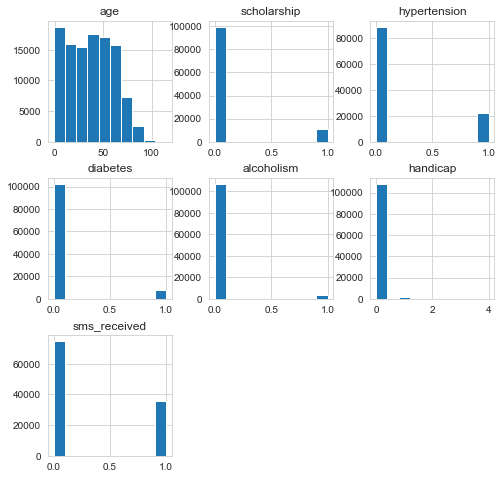

In [227]:
df.hist(figsize=(8,8));

>I noticed the presence of null values in the age category (0) as well as (2 & 4) in the handicap category.
<br>First, I'll check the null values in age

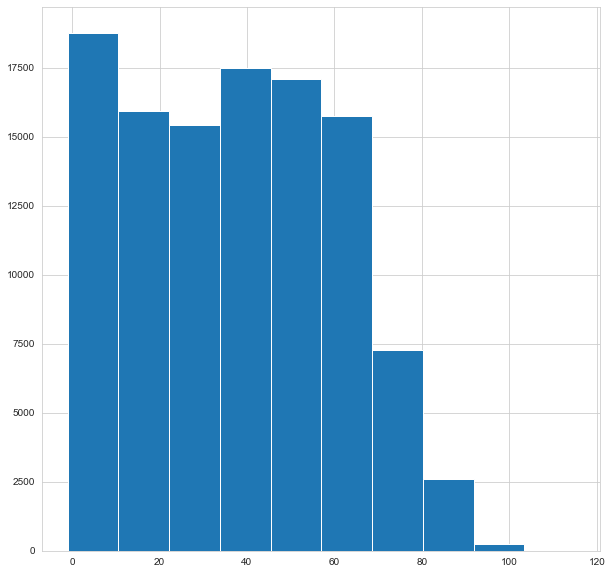

In [228]:
df.age.hist(figsize=(10,10)); 

In [229]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

> I noticed the presence of (-1) and (0) values

In [230]:
df[df['age'] == -1]

gender scheduled_time day_of_week  age neighbourhood  scholarship  \
99832      F       08:58:13      Monday   -1         ROMÃO            0   

       hypertension  diabetes  alcoholism  handicap  sms_received no_show  
99832             0         0           0         0             0      No

In [231]:
df[df['age'] == 0]

gender scheduled_time day_of_week  age      neighbourhood  scholarship  \
59          F       08:08:43      Friday    0          CONQUISTA            0   
63          M       10:46:12      Friday    0       SÃO BENEDITO            0   
64          M       13:28:21      Friday    0  ILHA DAS CAIEIRAS            0   
65          M       10:48:50      Friday    0          CONQUISTA            0   
67          F       08:53:02      Friday    0     NOVA PALESTINA            0   
...       ...            ...         ...  ...                ...          ...   
110345      F       12:30:58   Wednesday    0        RESISTÊNCIA            0   
110346      M       14:22:34   Wednesday    0        RESISTÊNCIA            0   
110454      F       15:18:44      Friday    0        RESISTÊNCIA            0   
110460      F       08:56:51      Friday    0        RESISTÊNCIA            0   
110507      F       09:04:18   Wednesday    0        MARIA ORTIZ            0   

        hypertension  diabetes  alcoholism  handicap  sms_received no_show  
59                 0         0           0         0             0      No  
63                 0         0           0         0             0      No  
64                 0         0           0         0             1      No  
65                 0         0           0         0             0      No  
67                 0         0           0         0             0      No  
...              ...       ...         ...       ...           ...     ...  
110345             0         0           0         0             0      No  
110346             0         0           0         0             0      No  
110454             0         0           0         0             0      No  
110460             0         0           0         0             0      No  
110507             0         0           0         0             0      No  

[3539 rows x 12 columns]

>I'll drop the (-1) row and replace the (0) rows with the mean age

In [232]:
df.drop([99832], inplace=True)

In [233]:
mean_age = df.age.mean()

In [234]:
mean_age

37.089218826339504

In [235]:
df['age']=df['age'].replace(0,37)

In [236]:
df[df['age'] == 0]

Empty DataFrame
Columns: [gender, scheduled_time, day_of_week, age, neighbourhood, scholarship, hypertension, diabetes, alcoholism, handicap, sms_received, no_show]
Index: []

In [237]:
df.head()

gender scheduled_time day_of_week  age      neighbourhood  scholarship  \
0      F       18:38:08      Friday   62    JARDIM DA PENHA            0   
1      M       16:08:27      Friday   56    JARDIM DA PENHA            0   
2      F       16:19:04      Friday   62      MATA DA PRAIA            0   
3      F       17:29:31      Friday    8  PONTAL DE CAMBURI            0   
4      F       16:07:23      Friday   56    JARDIM DA PENHA            0   

   hypertension  diabetes  alcoholism  handicap  sms_received no_show  
0             1         0           0         0             0      No  
1             0         0           0         0             0      No  
2             0         0           0         0             0      No  
3             0         0           0         0             0      No  
4             1         1           0         0             0      No

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I've cleaned my data it's time to answer the questions


### Research Question 1 (On which day of the week do patients frequently miss their appointments?)

>I'll draw a bar graph plotting the number of no-show appointments for each day of the week.

In [238]:
noshow1 = df.groupby(['day_of_week']).count()['no_show']

In [239]:
noshow1

day_of_week
Friday       19019
Monday       22714
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: no_show, dtype: int64

In [240]:
Fri = noshow1['Friday']

In [241]:
Sat = noshow1['Saturday']

In [242]:
Mon = noshow1['Monday']

In [243]:
Tue = noshow1['Tuesday']

In [244]:
Wed = noshow1['Wednesday']

In [245]:
Thu = noshow1['Thursday']

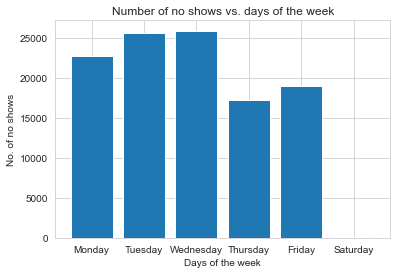

In [246]:
title1 = 'Number of no shows vs. days of the week'
xlabel1 = 'Days of the week'
ylabel1 = 'No. of no shows'
tick_label1 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
locations = [1,2,3,4,5,6]
heights = [Mon, Tue, Wed, Thu, Fri, Sat]
plt.bar(locations, heights, tick_label=tick_label1)
plt.title(title1)
plt.xlabel(xlabel1)
plt.ylabel(ylabel1);




>Below you can see the statistical data of the no-show appointments per day of the week. 

In [247]:
noshow1.describe()

count        6.000000
mean     18421.000000
std       9650.083212
min         39.000000
25%      17690.000000
50%      20866.500000
75%      24908.500000
max      25867.000000
Name: no_show, dtype: float64

### Research Question 2 (Do neighbourhoods play a role in patients missing their appoinments?)

>I'll draw a bar graph plotting the number of no-show appointments for each neighbourhood.

In [248]:
noshow2 = df.groupby(['neighbourhood']).count()['no_show']
noshow2

neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1977
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: no_show, Length: 81, dtype: int64

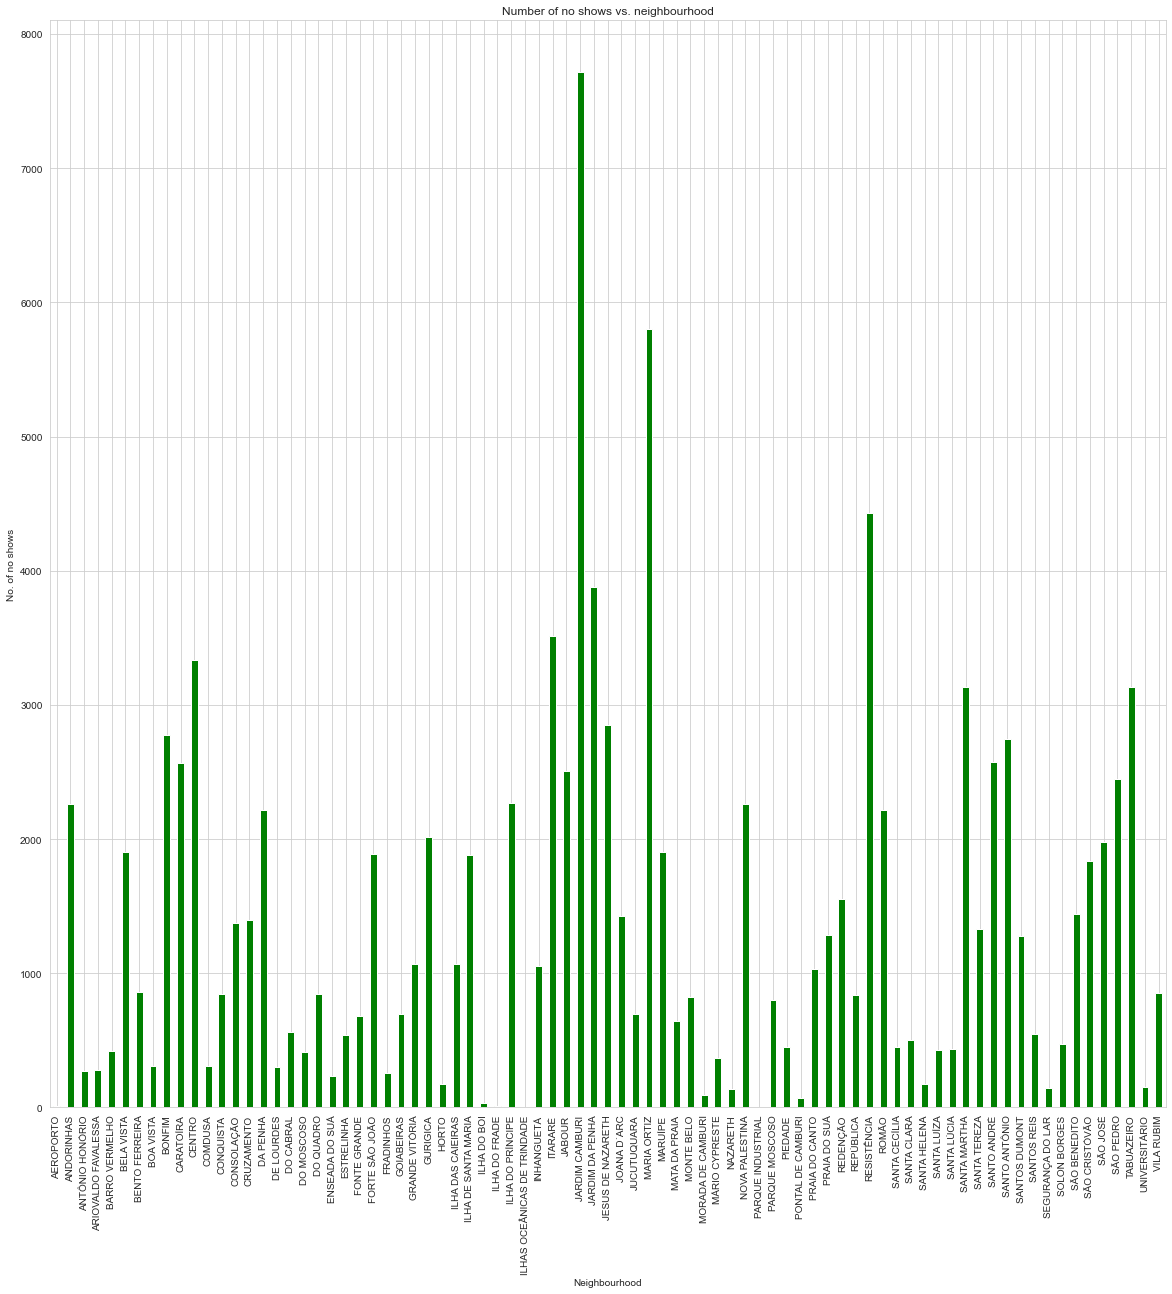

In [249]:
title2 = 'Number of no shows vs. neighbourhood'
xlabel2 = 'Neighbourhood'
ylabel2 = 'No. of no shows'
noshow2.plot(kind='bar', title=title2, xlabel=xlabel2, ylabel=ylabel2, figsize=(20,20), color='green');

> Maximum number of no-shows

In [250]:
noshow2.max()

7717

>Below you can see the statistical data of the no-show appointments per neighbourhood. 

In [251]:
noshow2.describe()

count      81.000000
mean     1364.518519
std      1369.191779
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: no_show, dtype: float64

### Research Question 3 (Patients on the Bolsa Família social welfare program; are they most likely to miss their appointments or not?)

>I'll draw a bar graph plotting the number of no-show appointments for patients who are not on the Bolsa Família scholarship vs. who are registered on it.

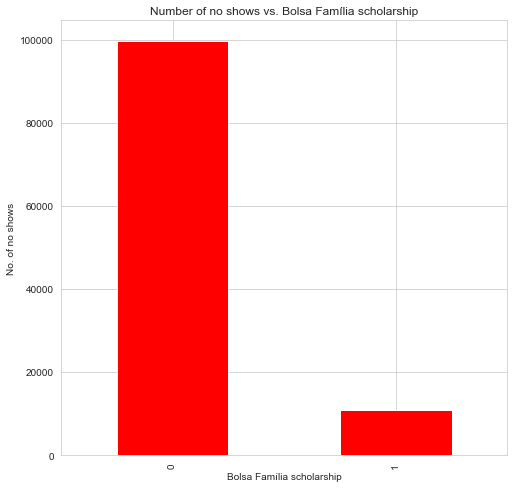

In [252]:
noshow3 = df.groupby(['scholarship']).count()['no_show']
title3 = 'Number of no shows vs. Bolsa Família scholarship'
xlabel3 = 'Bolsa Família scholarship'
ylabel3 = 'No. of no shows'
noshow3.plot(kind='bar', title=title3, xlabel=xlabel3, ylabel=ylabel3, figsize=(8,8), color='red');

>Number of no-shows in patients who are not on the Bolsa Família social welfare program vs. who are registered on it.


In [253]:
noshow3

scholarship
0    99665
1    10861
Name: no_show, dtype: int64

 ### Research Question 4 (Does sending an SMS to remind patients of their appointments make a difference or not?)

>I'll draw a bar graph plotting the number of no-show appointments for patients who didn't receive an SMS reminding them of their appointment vs. those who did.

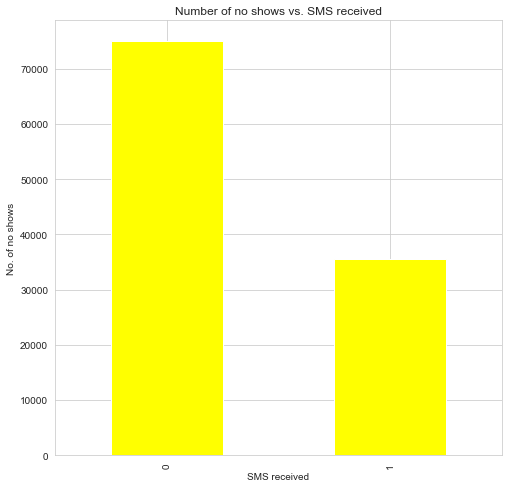

In [254]:
noshow4 = df.groupby(['sms_received']).count()['no_show']
title4 = 'Number of no shows vs. SMS received'
xlabel4 = 'SMS received'
ylabel4 = 'No. of no shows'
noshow4.plot(kind='bar', title=title4, xlabel=xlabel4, ylabel=ylabel4, figsize=(8,8), color='yellow');

>Number of no-shows in patients patients who didn't receive an SMS reminding them of their appointment vs. those who did.


In [255]:
noshow4

sms_received
0    75044
1    35482
Name: no_show, dtype: int64

### Research Question 5 (Does the difference in gender affect the number of missing appointments for patients who received an SMS?)

>First, I'll group both the 'gender' and 'sms_received' columns count in regards to missing their appointments.

In [256]:
noshow_counts = df.groupby(['gender', 'sms_received']).count()['no_show']
noshow_counts

gender  sms_received
F       0               47637
        1               24202
M       0               27407
        1               11280
Name: no_show, dtype: int64

>In the results below I noticed that the number of females is almost more than double that of the males. <br>
Therefore, they cannot be accurately compared.

>I'll calculate their proportions and then draw a bar chart accordingly.

In [257]:
noshow_totals = df.groupby('gender').count()['no_show']
noshow_totals

gender
F    71839
M    38687
Name: no_show, dtype: int64

In [258]:
male_proportions = noshow_counts['M'] / noshow_totals['M']
male_proportions

sms_received
0    0.708429
1    0.291571
Name: no_show, dtype: float64

In [259]:
female_proportions = noshow_counts['F'] / noshow_totals['F']
female_proportions

sms_received
0    0.663108
1    0.336892
Name: no_show, dtype: float64

>I'll draw a bar graph plotting the difference between males and females in number of no-show appointments for patients who didn't receive an SMS reminding them of their appointment vs. those who did .

In [260]:
ind = np.arange(len(male_proportions))
width = 0.35

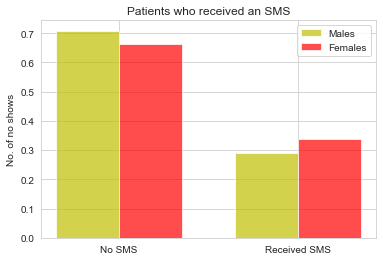

In [261]:
red_bars = plt.bar(ind, male_proportions, width, color='y', alpha=.7, label='Males')
white_bars = plt.bar(ind + width, female_proportions, width, color='r', alpha=.7, label='Females')

plt.ylabel('No. of no shows')
plt.title('Patients who received an SMS')
locations = ind + width / 2
labels = ['No SMS', 'Received SMS']
plt.xticks(locations, labels)
plt.legend();

In [262]:
male_proportions

sms_received
0    0.708429
1    0.291571
Name: no_show, dtype: float64

In [263]:
female_proportions

sms_received
0    0.663108
1    0.336892
Name: no_show, dtype: float64

<a id='conclusions'></a>
## Conclusions
**Answer to question (1)**: On which day of the week do patients frequently miss their appointments?<br>
Wednesday is the day with the highest count with 25867 no shows.<br>
However, more than 50% of the no-shows were on the 3 first week-days (Monday, Tuesday and Wednesday) dereasing on thursday then increasing again on Friday and significantly decreasing on Saturday.

**Answer to question (2)**: Do neighbourhoods play a role in patients missing their appoinments?<br>
Yes, they do.
The highest missed appointments from the Neighourhood "JARDIM CAMBURI" with 7586 no-shows.

**Answer to question (3)**: Patients on the Bolsa Família social welfare program; are they most likely to miss their appointments or not?<br>
Being part of the Bolsa Família social welfare program is related with a significanty lower number of no-shows.<br>
10861 vs. 99665.

**Answer to question (4)**: Does sending an SMS to remind patients of their appointments make a difference or not?<br>
Receiving an SMS decreased the number of no-show for appointments. However, many patients missed their appointments although they received an SMS.

**Answer to question (5)**: Does the difference in gender affect the number of missing appointments for patients who received an SMS?<br>
Males attended slighlty less appointments than females in case of not receiving an SMS, while in case of receiving an SMS they attended slightl more appointments than females. 

### Limitations
> My biggest challenge was to change the dates to days of the week, although that took a lot of time to reach, it turned out pretty simple and easy at the end.<br>

> I've tried increasing the size of the figure in Q(1) using matplotlib by using this code <br>**from matplotlib.pyplot import figure<br>figure(figsize=(16,16))**<br>and still it is not working. 